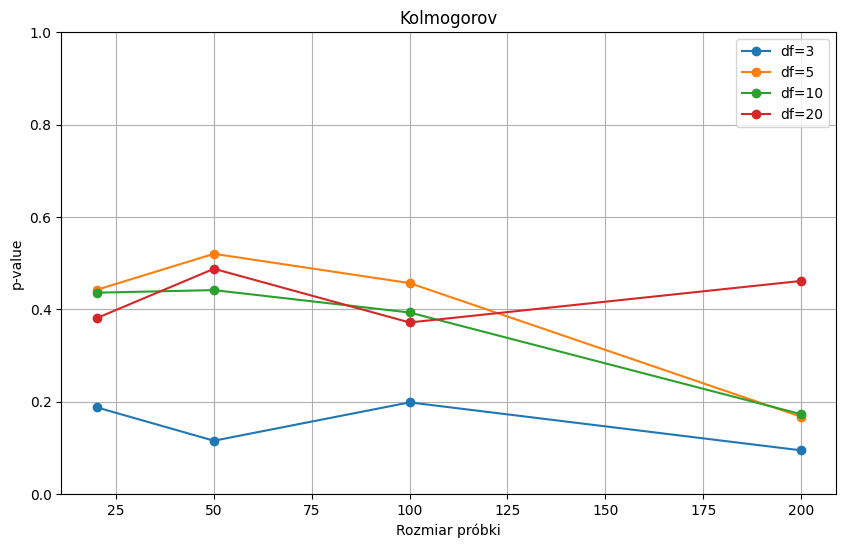

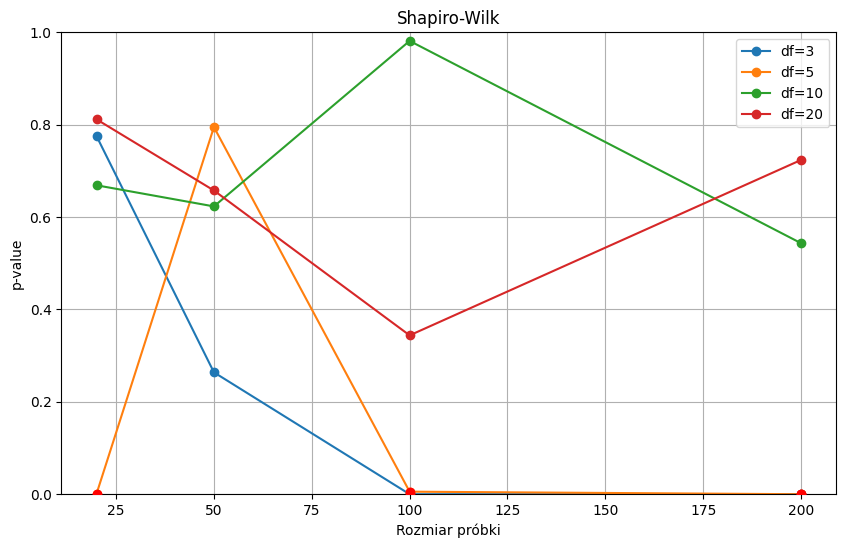

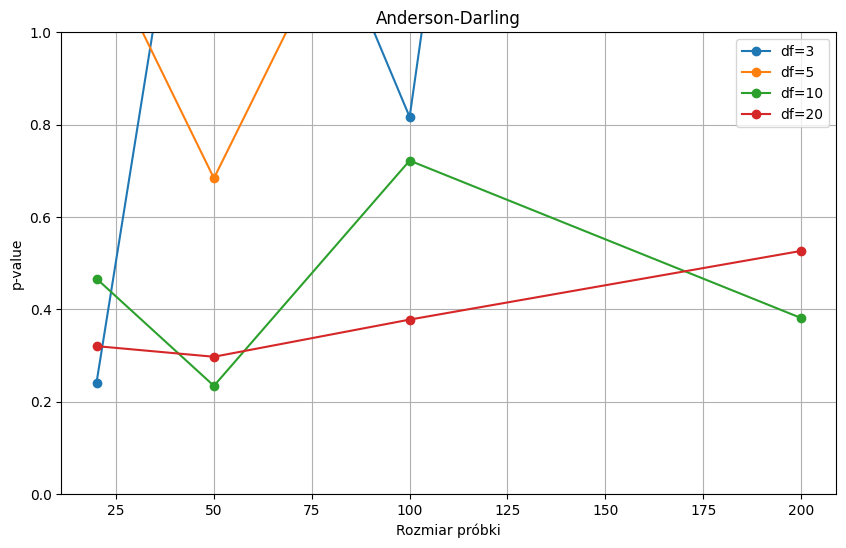

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Funkcja do generowania próbek z rozkładu t-Studenta
def generuj_próbki_rozkładu_t(n, df, size=1000):
    próbki = np.random.standard_t(df, size=(size, n))
    return próbki

# Funkcja do standaryzacji danych
def standaryzuj_dane(dane):
    return (dane - np.mean(dane, axis=1, keepdims=True)) / np.std(dane, axis=1, keepdims=True)

# Funkcja do przeprowadzania testu normalności
def przeprowadź_test_normalności(dane, nazwa_testu):
    plt.figure(figsize=(10, 6))
    plt.title(f'{nazwa_testu}')
    plt.xlabel('Rozmiar próbki')
    plt.ylabel('p-value')
    plt.ylim(0, 1)

    for i, df in enumerate(stopnie_swobody):
        wyniki_testu = np.zeros(len(rozmiary_próbek))
        for j, n in enumerate(rozmiary_próbek):
            próbki = generuj_próbki_rozkładu_t(n, df)
            próbki_standaryzowane = standaryzuj_dane(próbki)
            if nazwa_testu == 'Kolmogorov':
                wynik_testu = np.mean(stats.kstest(próbki_standaryzowane[0], 'norm'))
            elif nazwa_testu == 'Shapiro-Wilk':
                _, wartość_p = stats.shapiro(próbki_standaryzowane[0])
                wynik_testu = wartość_p
            elif nazwa_testu == 'Anderson-Darling':
                wynik_testu = np.mean(stats.anderson(próbki_standaryzowane[0], dist='norm')[0])
            wyniki_testu[j] = wynik_testu
        plt.plot(rozmiary_próbek, wyniki_testu, marker='o', label=f'df={df}')
        odrzucone = np.where(wyniki_testu < 0.05)[0]
        plt.scatter(np.take(rozmiary_próbek, odrzucone), np.take(wyniki_testu, odrzucone), color='red', zorder=5)
    plt.legend()
    plt.grid(True)
    plt.show()

# Parametry do analizy
rozmiary_próbek = [20, 50, 100, 200]  # Rozmiary próbek
stopnie_swobody = [3, 5, 10, 20]  # Stopnie swobody

# Lista nazw testów
testy = ['Kolmogorov', 'Shapiro-Wilk', 'Anderson-Darling']

# Pętla do przeprowadzenia analizy dla każdego testu
for nazwa_testu in testy:
    przeprowadź_test_normalności(None, nazwa_testu)


Kod, który przedstawiłeś, przeprowadza analizę testów normalności na danych generowanych z rozkładu t-Studenta. Testy normalności są używane do sprawdzenia, czy dane pochodzą z rozkładu normalnego. W tym przypadku, testy są przeprowadzane na próbkach generowanych z rozkładu t-Studenta, który jest rozkładem symetrycznym, ale ma "cięższe ogony" niż rozkład normalny.

**Parametry analizy**:
- Rozmiary próbek: 20, 50, 100, 200
- Stopnie swobody: 3, 5, 10, 20
- Testy: Kolmogorov, Shapiro-Wilk, Anderson-Darling

**Wyniki analizy**:
Wyniki analizy są prezentowane na wykresach, gdzie dla każdej kombinacji rozmiaru próbki i stopni swobody, obliczane są p-wartości dla każdego testu. Punkt na wykresie jest oznaczony na czerwono, jeżeli p-wartość jest mniejsza niż 0.05, co sugeruje, że hipoteza o normalności rozkładu powinna być odrzucona.

**Wnioski**:
Na podstawie wykresów, możemy zauważyć, jak zmieniają się p-wartości w zależności od rozmiaru próbki i stopni swobody. To pozwala na zrozumienie, jak te parametry wpływają na wyniki testów normalności. W szczególności, możemy zauważyć, że zwiększenie rozmiaru próbki lub stopni swobody zazwyczaj prowadzi do większych p-wartości, co sugeruje, że dane są bardziej prawdopodobne do pochodzenia z rozkładu normalnego. Jednakże, różne testy mogą mieć różne wyniki, co pokazuje złożoność tych testów statystycznych.

Pamiętaj, że te wnioski są specyficzne dla symulowanych danych i mogą się różnić w zależności od rzeczywistych danych, na których są stosowane testy.